In [19]:
import pandas as pd
import ast
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier

In [21]:
df = pd.read_csv("movies_metadata.csv")
df2 = pd.read_csv("credits.csv")
df2.head()

C:\Users\ana clara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [22]:
atores = []
for e in range(0,len(df2["cast"])):
        data_dict = ast.literal_eval(df2["cast"][e])
        for palavras in data_dict:
            atores.append(palavras['name'])
# #atores
# df_atores = pd.DataFrame(atores)
# #df_atores.head()
# df_atores[0].value_counts().head()

atores       

['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger',
 'Annie Potts',
 'John Morris',
 'Erik von Detten',
 'Laurie Metcalf',
 'R. Lee Ermey',
 'Sarah Freeman',
 'Penn Jillette',
 'Robin Williams',
 'Jonathan Hyde',
 'Kirsten Dunst',
 'Bradley Pierce',
 'Bonnie Hunt',
 'Bebe Neuwirth',
 'David Alan Grier',
 'Patricia Clarkson',
 'Adam Hann-Byrd',
 'Laura Bell Bundy',
 'James Handy',
 'Gillian Barber',
 'Brandon Obray',
 'Cyrus Thiedeke',
 'Gary Joseph Thorup',
 'Leonard Zola',
 'Lloyd Berry',
 'Malcolm Stewart',
 'Annabel Kershaw',
 'Darryl Henriques',
 'Robyn Driscoll',
 'Peter Bryant',
 'Sarah Gilson',
 'Florica Vlad',
 'June Lion',
 'Brenda Lockmuller',
 'Walter Matthau',
 'Jack Lemmon',
 'Ann-Margret',
 'Sophia Loren',
 'Daryl Hannah',
 'Burgess Meredith',
 'Kevin Pollak',
 'Whitney Houston',
 'Angela Bassett',
 'Loretta Devine',
 'Lela Rochon',
 'Gregory Hines',
 'Dennis Haysbert',
 'Michael Beach',
 'Mykelti Williamson',
 'Lamont Johnso

In [23]:
#pprint(data_dict)

In [24]:
# data_dict[1]['name']

In [25]:
df['original_title'].head()

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: original_title, dtype: object

In [26]:
df.drop_duplicates(subset ="original_title", 
                     keep = 'first', inplace = True) 
df["original_title"].value_counts().value_counts()


1    43373
Name: original_title, dtype: int64

In [38]:
df['bilhao'] = df.revenue > 1e9



In [43]:
df_0 = df[df['revenue'] > 0]
df_budget = df_0[df_0['budget'] != '0']
df_clean = df_budget[df_budget['production_companies'] != '[]']
df_super_clean = df_clean[df_clean['genres'] != '[]']
df_super_clean

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,bilhao
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,False
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,False
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,8.145216e+07,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,False
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1.874368e+08,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,False
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,6.435017e+07,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,False
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,False
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,1.078795e+08,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,False
13,False,NaN,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1.368176e+07,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0,False
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,1.001732e+07,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,False
15,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,1.161124e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,False


In [58]:
df_mega_clean = df_super_clean[["genres","budget","revenue","production_companies"]]
df_mega_clean['budget'] = df_mega_clean['budget'].astype(float)
df_mega_clean

C:\Users\ana clara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,genres,budget,revenue,production_companies
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,3.735540e+08,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,2.627972e+08,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,8.145216e+07,[{'name': 'Twentieth Century Fox Film Corporat...
5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,1.874368e+08,"[{'name': 'Regency Enterprises', 'id': 508}, {..."
8,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,6.435017e+07,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."
9,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",58000000.0,3.521940e+08,"[{'name': 'United Artists', 'id': 60}, {'name'..."
10,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62000000.0,1.078795e+08,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."
13,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",44000000.0,1.368176e+07,"[{'name': 'Hollywood Pictures', 'id': 915}, {'..."
14,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",98000000.0,1.001732e+07,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na..."
15,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",52000000.0,1.161124e+08,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."


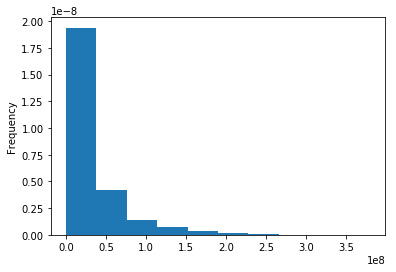

In [59]:
df_super_clean.budget.plot.hist(density = True)

# Random Forest

# One Hot Encoder